In [4]:
#-----------------------------------------------------------------------
# analyze_opt_solver_results.py
# Author: Rebecca Barber
# 
# analyze the results of mel's opt auction solver (program that solves
# the BIC LP). try to see if the optimal rev is O(sqrt(n)) or O(log(n))
# or something in between.
#-----------------------------------------------------------------------

import numpy as np
from math import *
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# read in csv file
data = pd.read_csv("./data/matt_attempt.csv") 
data = data[0:36]

In [6]:
num_bidders = data['n_1']
revs = data['rev']
# subtract 2n from rev
adj_revs = [revs[i] - 2 * num_bidders[i] for i in range(len(revs))]

<Figure size 648x360 with 0 Axes>

Text(0.5, 1.0, 'Optimal Revenue via Computation')

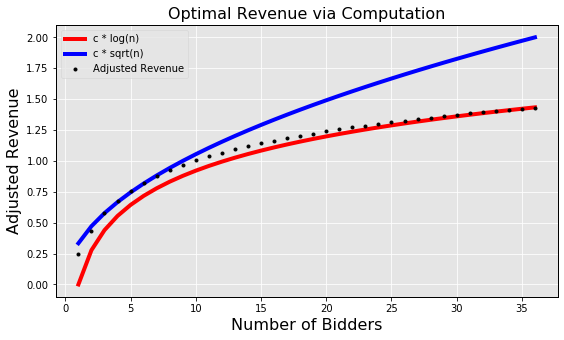

In [16]:
# plot the results
log_bench = [np.log(n)/2.5 for n in num_bidders]
sqrt_bench = [np.sqrt(n)/3 for n in num_bidders]

figure_name = './figures/matt_input_' + str(len(num_bidders)) + 'bidders.png'

plt.style.use('ggplot')
plt.figure(figsize=(9,5))
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'}):
    plt.plot(num_bidders, log_bench, 'r-',
         num_bidders, sqrt_bench, 'b-',
         num_bidders, adj_revs,'ko', 
         markersize=3, linewidth = 4)
plt.legend(['c * log(n)', 'c * sqrt(n)', 'Adjusted Revenue'])
xlab = plt.xlabel('Number of Bidders', fontsize=16)
ylab = plt.ylabel('Adjusted Revenue', fontsize=16)
xlab.set_color('black')
ylab.set_color('black')
plt.title("Optimal Revenue via Computation", fontsize = 16)
plt.savefig(figure_name, dpi=300)

In [15]:
# DOUBLE CHECK THIS!!!!!!
# For fitting y = A log x + B, just fit y against (log x)
# For fitting y = A sqrt x + B, just fit y against (sqrt x)
# https://stackoverflow.com/questions/3433486/how-to-do-
# exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
log_fit = np.polyfit(np.log(num_bidders), adj_revs, 1, full = True)
sqrt_fit = np.polyfit(np.sqrt(num_bidders), adj_revs, 1, full = True)
print('log fit: \na =', log_fit[0][0], '\nb =', log_fit[0][1], '\nerror =', log_fit[1][0])
print('\nsqrt fit: \na =', sqrt_fit[0][0], '\nb =', sqrt_fit[0][1], '\nerror =', sqrt_fit[1][0])

log fit: 
a = 0.339408686841624 
b = 0.2193407995713825 
error = 0.001951452421507612

sqrt fit: 
a = 0.20594465728932074 
b = 0.2819967470107958 
error = 0.16288510734472786


In [13]:
data

,n_1,rev,time,rev-2n,sqrt(n),log(n),sqrt(n)/rev-2n,log(n)/rev-2n
0,1,2.250000,16.444843,0.250000,1.000000,0.000000,4.000000,0.000000
1,2,4.435394,522.756300,0.435394,1.414214,0.693147,3.248124,1.592000
2,3,6.575226,399.642200,0.575226,1.732051,1.098612,3.011081,1.909881
3,4,8.677855,388.321960,0.677855,2.000000,1.386294,2.950485,2.045120
4,5,10.758596,459.284420,0.758596,2.236068,1.609438,2.947639,2.121600
5,6,12.824174,4735.692400,0.824174,2.449490,1.791759,2.972053,2.174006
6,7,14.878983,572.443800,0.878983,2.645751,1.945910,3.010014,2.213820
7,8,16.925943,336.060520,0.925943,2.828427,2.079442,3.054644,2.245754
8,9,18.966974,4112.841000,0.966975,3.000000,2.197225,3.102460,2.272267
9,10,21.003304,340.121520,1.003304,3.162278,2.302585,3.151865,2.295003
